# Example 1: Use of surface model Dubois95 and canopy model SSRT

## 1. Requirements

- Installation of SenSE

## 2. Dubois95+SSRT for different incidence angles

In [41]:
import numpy as np
#from sense.surface import Dubois95, Oh92
from sense.util import f2lam
from sense.model import RTModel
from sense.soil import Soil
from sense.canopy import OneLayer
import matplotlib.pyplot as plt

In [42]:
theta_deg = np.arange(0.,70.)
theta = np.deg2rad(theta_deg)

# soil model paraters
f  = 13.  # GHz
lam = f2lam(f)  # m
s = 0.0015  # m
eps = 15. - 4.0j


models = {'surface' : 'Dubois95', 'canopy' : 'turbid_rayleigh'}

pol='vv'


In [43]:
# short alfalfa
omega = 0.1
d = 0.17
tau = 2.5
ke = tau/d
omega = 0.27
ks=omega*ke
# Soil model initialization
S = Soil(f=f, s=s, eps=eps)
# Canopy model initialization
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
# Combined Model initialization
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
# Run RT model
RT.sigma0()
back_short = RT.stot[pol]

In [44]:
# tall alfalfa
d = 0.55
tau = 0.45
ke = tau/d
omega = 0.175
ks=omega*ke
S = Soil(f=f, s=s, eps=eps)
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
RT.sigma0()

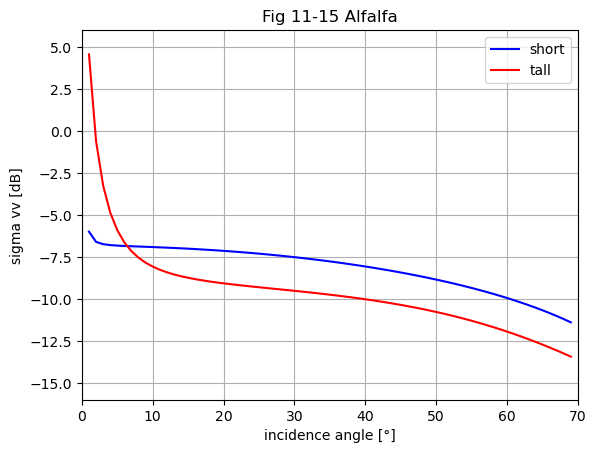

In [45]:
# plot first part
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta_deg, 10.*np.log10(back_short), label='short', color='b')
ax.plot(theta_deg, 10.*np.log10(RT.stot[pol]), label='tall', color='r')

ax.legend()
ax.set_title('Fig 11-15 Alfalfa')


ax.grid()
ax.set_xlabel('incidence angle [°]')
ax.set_ylabel('sigma vv [dB]')
ax.set_xlim(0.,70.)
ax.set_ylim(-16.,6.)

plt.show()